In [ ]:
!pip install fastai --upgrade
!pip install timm wwf

     |████████████████████████████████| 194kB 7.9MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 12.8MB 220kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 296kB 7.5MB/s 


In [ ]:
!wget https://www.dropbox.com/s/qrdswgzv63o3opg/datasetCorregido.zip?dl=1 -O erm.zip

--2021-03-08 18:12:45--  https://www.dropbox.com/s/qrdswgzv63o3opg/datasetCorregido.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/qrdswgzv63o3opg/datasetCorregido.zip [following]
--2021-03-08 18:12:45--  https://www.dropbox.com/s/dl/qrdswgzv63o3opg/datasetCorregido.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8e3651dab839988019cfb8fe35.dl.dropboxusercontent.com/cd/0/get/BKSoEDwrL1BoDTBhfqk7DohaXcIQtjG6SKDo6kOPjxL4-hz2XpzNvVEIv7aN8t1aXU-dJMi4kqy97CnSq5NV5WBx_s1h-NRys1S4q3ohsUtCkDoH8S7MpeGSTCuHRSVzZZCZ8MiweW4kkX93opzzpMKT/file?dl=1# [following]
--2021-03-08 18:12:46--  https://uc8e3651dab839988019cfb8fe35.dl.dropboxusercontent.com/cd/0/get/BKSoEDwrL1BoDTBhfqk7DohaXcIQtjG6SKDo6kOPjxL4-hz2XpzNvVEIv7aN8t1a

In [ ]:
!unzip erm.zip

Archive:  erm.zip
   creating: datasetCorregido/
   creating: datasetCorregido/train/
   creating: datasetCorregido/train/no/
  inflating: datasetCorregido/train/no/anonymized_482127.jpg  
  inflating: datasetCorregido/train/no/anonymized_174749.jpg  
  inflating: datasetCorregido/train/no/anonymized_734047.jpg  
  inflating: datasetCorregido/train/no/anonymized_581767.jpg  
  inflating: datasetCorregido/train/no/anonymized_1400777.jpg  
  inflating: datasetCorregido/train/no/anonymized_347431.jpg  
  inflating: datasetCorregido/train/no/anonymized_626433.jpg  
  inflating: datasetCorregido/train/no/anonymized_1372303.jpg  
  inflating: datasetCorregido/train/no/anonymized_1324599.jpg  
  inflating: datasetCorregido/train/no/anonymized_196853.jpg  
  inflating: datasetCorregido/train/no/anonymized_687000.jpg  
  inflating: datasetCorregido/train/no/anonymized_504041.jpg  
  inflating: datasetCorregido/train/no/anonymized_1414333.jpg  
  inflating: datasetCorregido/train/no/anonymized_3

In [ ]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *

In [ ]:
path = Path('datasetCorregido/')
trainPath = path/'train'
testPath = path/'test'

In [ ]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(presize),
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=360,max_warp=0,max_zoom=1.1,
                      max_lighting=0.1,p_lighting=0.5), Normalize.from_stats(*imagenet_stats)])

In [ ]:
db512 = getDataBlock()
dls512 = db512.dataloaders(trainPath,bs=32)

In [ ]:
from fastai.vision.all import *
import timm
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18')
]

In [ ]:
modelo=timm.models.hrnet.hrnet_w44(num_classes=2)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-hrnet/hrnetv2_w32-90d8c5fb.pth" to /root/.cache/torch/hub/checkpoints/hrnetv2_w32-90d8c5fb.pth


In [ ]:
lr=1e-4

## Ranger

In [ ]:
opt_func = partial(ranger, beta=0.99, eps=1e-6)

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

SuggestedLRs(lr_min=0.00010000000474974513, lr_steep=0.05754399299621582)

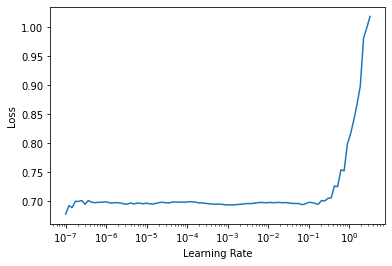

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.694150,0.691917,0.512232,0.498371,0.481132,01:42
1,0.690964,0.690897,0.525994,0.508696,0.735849,01:42


Better model found at epoch 0 with valid_loss value: 0.6919167637825012.


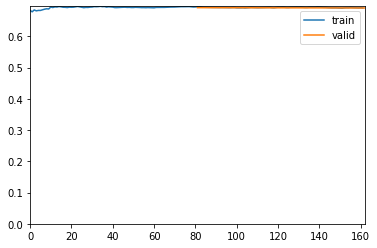

Better model found at epoch 1 with valid_loss value: 0.69089674949646.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.687032,0.688562,0.525994,0.511429,0.562893,01:41
1,0.688369,0.687336,0.529052,0.516129,0.503145,01:42
2,0.686309,0.685525,0.532110,0.521127,0.465409,01:42
3,0.684663,0.684241,0.522936,0.512605,0.383648,01:42
4,0.681743,0.682940,0.544343,0.572464,0.248428,01:42
5,0.679018,0.680383,0.545872,0.557377,0.320755,01:42
6,0.675948,0.675701,0.573394,0.565217,0.531447,01:42
7,0.671752,0.674722,0.564220,0.567347,0.437107,01:41
8,0.672363,0.673481,0.561162,0.542936,0.616352,01:42
9,0.667406,0.671673,0.573394,0.555874,0.610063,01:41


Better model found at epoch 0 with valid_loss value: 0.6885619759559631.


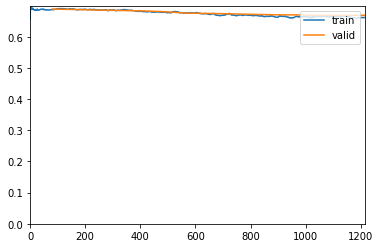

Better model found at epoch 1 with valid_loss value: 0.6873359084129333.
Better model found at epoch 2 with valid_loss value: 0.6855246424674988.
Better model found at epoch 3 with valid_loss value: 0.684240996837616.
Better model found at epoch 4 with valid_loss value: 0.682939887046814.
Better model found at epoch 5 with valid_loss value: 0.6803834438323975.
Better model found at epoch 6 with valid_loss value: 0.6757013201713562.
Better model found at epoch 7 with valid_loss value: 0.6747218370437622.
Better model found at epoch 8 with valid_loss value: 0.6734814047813416.
Better model found at epoch 9 with valid_loss value: 0.671673059463501.
Better model found at epoch 10 with valid_loss value: 0.6702314019203186.
Better model found at epoch 11 with valid_loss value: 0.6700105667114258.
Better model found at epoch 12 with valid_loss value: 0.6687197089195251.
Better model found at epoch 14 with valid_loss value: 0.6685168147087097.


In [ ]:
learn.fine_tune(15,freeze_epochs=2,base_lr=lr)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

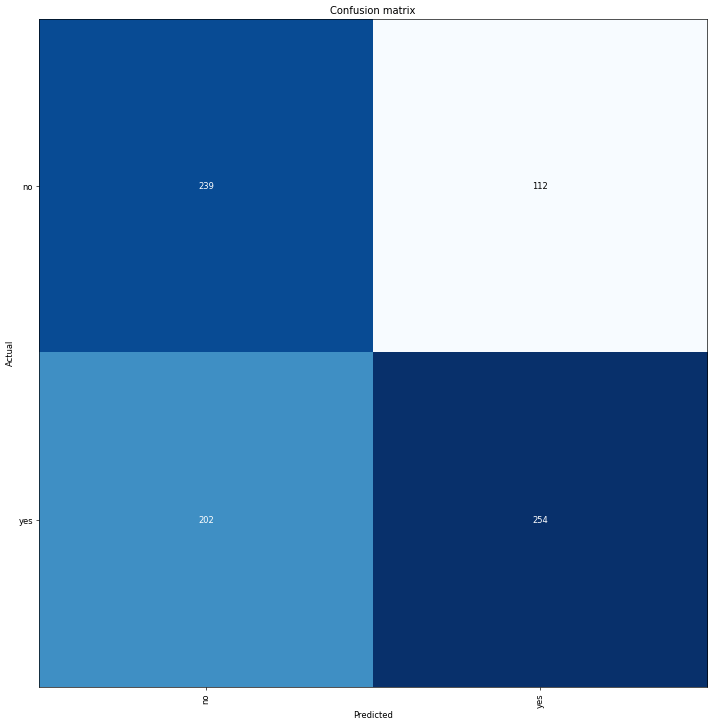

In [ ]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.6109045743942261.


(#4) [0.666479766368866,0.6109045743942261,0.6939890710382514,0.5570175438596491]

## Faltten

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.732305,0.695144,0.484709,0.485407,0.993711,01:40
1,0.722065,0.692317,0.513761,0.000000,0.000000,01:39


Better model found at epoch 0 with valid_loss value: 0.6951443552970886.


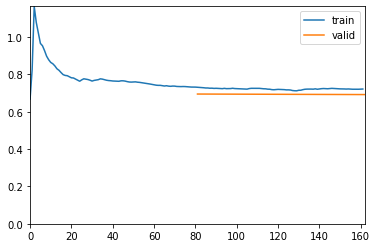

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Better model found at epoch 1 with valid_loss value: 0.6923173666000366.


In [ ]:
learn.fit_flat_cos(2,lr=1e-3)

In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=0.7585775852203369)

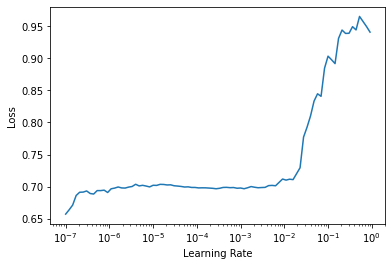

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.843824,0.689146,0.529052,0.625000,0.078616,01:39
1,0.726301,0.699625,0.513761,0.500000,0.669811,01:39
2,0.701652,0.693880,0.486239,0.486239,1.000000,01:38
3,0.695719,0.694918,0.483180,0.483607,0.927673,01:39


Better model found at epoch 0 with valid_loss value: 0.6891455054283142.


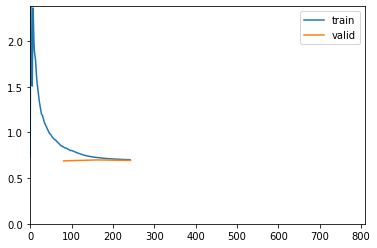

No improvement since epoch 0: early stopping


In [ ]:
learn.fit_flat_cos(10,lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

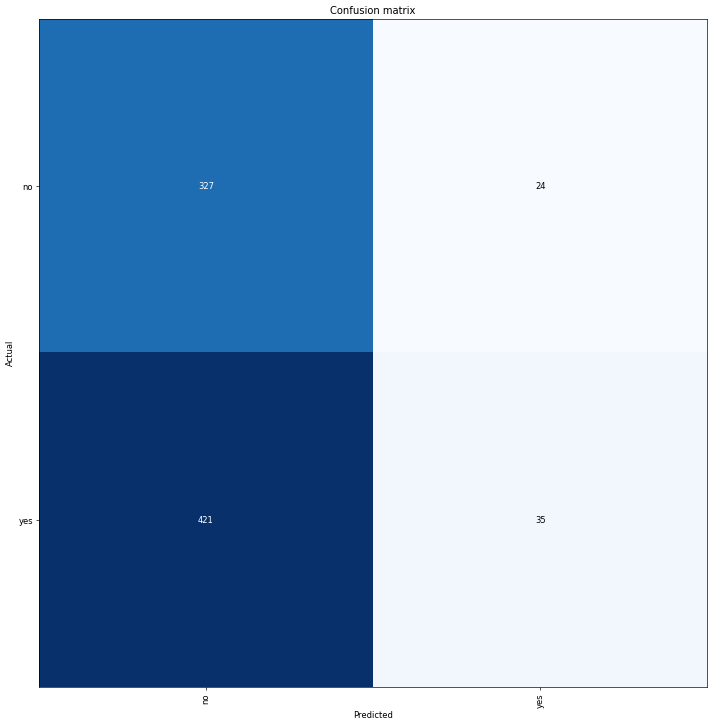

In [ ]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.448574960231781.


(#4) [0.7033547163009644,0.448574960231781,0.5932203389830508,0.07675438596491228]

## LabelSmoothing

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

SuggestedLRs(lr_min=0.00036307806149125097, lr_steep=0.2089296132326126)

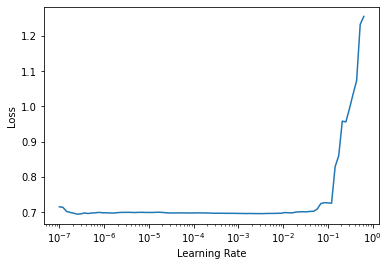

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.695024,0.698093,0.518349,0.545455,0.056604,01:39
1,0.696755,0.694546,0.486239,0.486239,1.000000,01:38


Better model found at epoch 0 with valid_loss value: 0.6980931162834167.


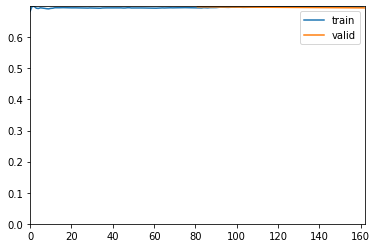

Better model found at epoch 1 with valid_loss value: 0.6945459842681885.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.693580,0.692357,0.518349,0.636364,0.022013,01:38
1,0.694201,0.693530,0.486239,0.486196,0.996855,01:39
2,0.694143,0.695644,0.486239,0.486239,1.000000,01:39
3,0.694108,1.045344,0.486239,0.486239,1.000000,01:39


Better model found at epoch 0 with valid_loss value: 0.6923566460609436.


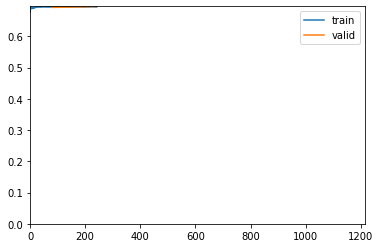

No improvement since epoch 0: early stopping


In [ ]:
learn.fine_tune(15,freeze_epochs=2,base_lr=lr)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

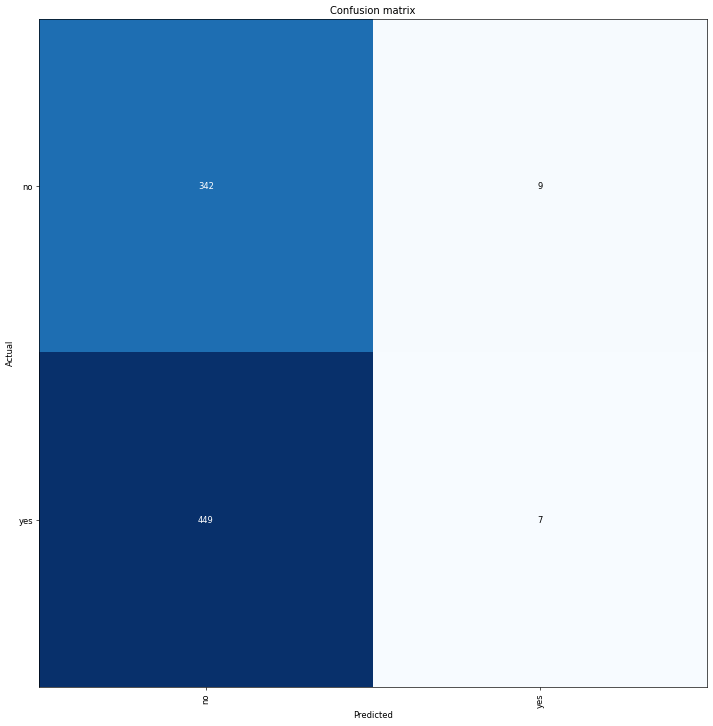

In [ ]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.43246591091156006.


(#4) [0.6948913931846619,0.43246591091156006,0.4375,0.015350877192982455]

## MixUp

In [ ]:
mixup=MixUp()
callbacks2 = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18'),
    mixup
]

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.693469,0.925073,0.486239,0.486239,1.000000,01:38
1,0.702519,1.064433,0.486239,0.486239,1.000000,01:39


Better model found at epoch 0 with valid_loss value: 0.9250732660293579.


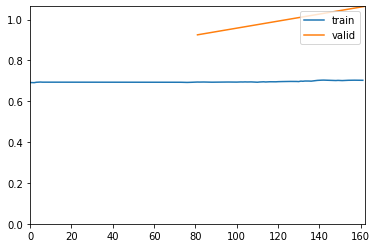

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.692798,0.694724,0.484709,0.485362,0.990566,01:39
1,0.693789,0.696693,0.477064,0.480392,0.924528,01:39
2,0.694431,0.697366,0.516820,0.535714,0.047170,01:39
3,0.694238,0.762168,0.486239,0.486239,1.000000,01:39


Better model found at epoch 0 with valid_loss value: 0.694723904132843.


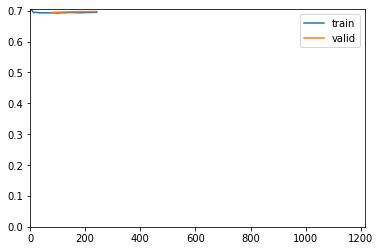

No improvement since epoch 0: early stopping


In [ ]:
learn.fine_tune(15,freeze_epochs=2,base_lr=lr)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

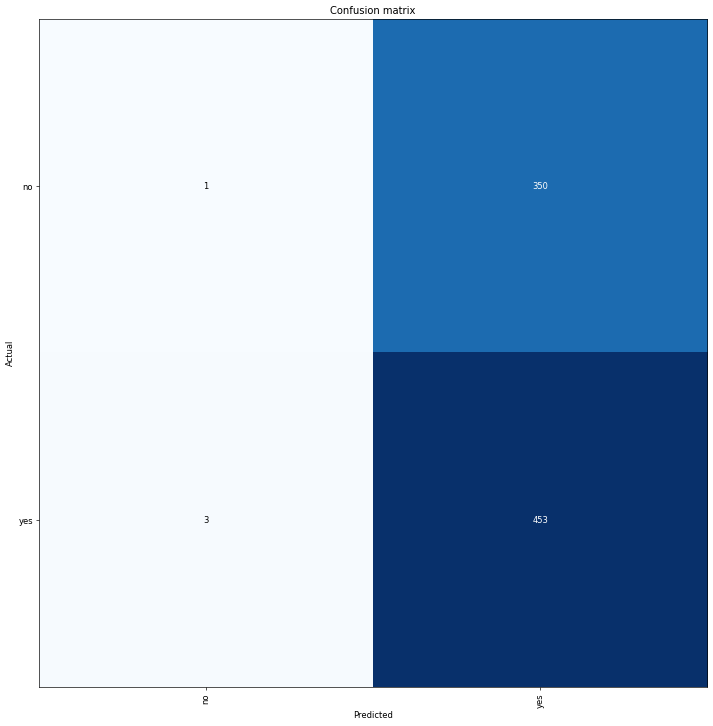

In [ ]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5625774264335632.


(#4) [0.7010732293128967,0.5625774264335632,0.564134495641345,0.993421052631579]

## Ranger + Flat cosin Anneal

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.693397,0.693087,0.486239,0.486239,1.000000,01:40
1,0.693025,0.693270,0.486239,0.486239,1.000000,01:40


Better model found at epoch 0 with valid_loss value: 0.6930868625640869.


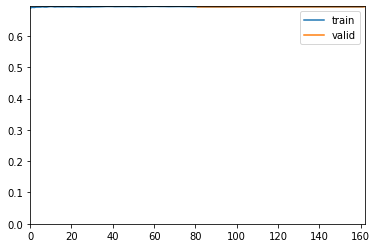

In [ ]:
learn.fit_flat_cos(2,lr=1e-3)

In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=6.309573450380412e-07)

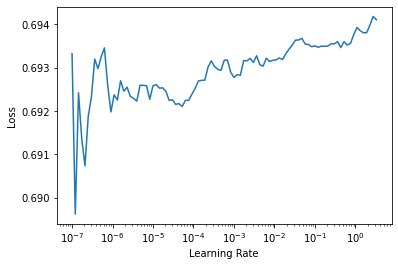

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.692940,0.693726,0.486239,0.486239,1.000000,01:40
1,0.693414,0.693762,0.484709,0.485407,0.993711,01:41
2,0.692871,0.693338,0.486239,0.486068,0.987421,01:40
3,0.693164,0.694333,0.486239,0.486111,0.990566,01:40
4,0.692891,0.694921,0.484709,0.485179,0.977987,01:41
5,0.693166,0.695906,0.481651,0.483619,0.974843,01:40


Better model found at epoch 0 with valid_loss value: 0.6937260627746582.


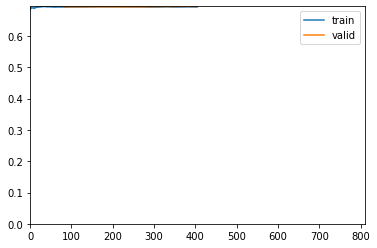

Better model found at epoch 2 with valid_loss value: 0.6933382153511047.
No improvement since epoch 2: early stopping


In [ ]:
learn.fit_flat_cos(10,lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5675340890884399.


(#4) [0.6900567412376404,0.5675340890884399,0.5674653215636822,0.9868421052631579]

## Ranger+Flar Cossin Anneal+LabelSmoothing

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.692885,0.693788,0.484709,0.485179,0.977987,01:40
1,0.692936,0.693720,0.481651,0.483721,0.981132,01:40


Better model found at epoch 0 with valid_loss value: 0.6937877535820007.


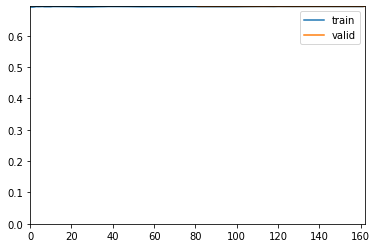

Better model found at epoch 1 with valid_loss value: 0.6937198042869568.


In [ ]:
learn.fit_flat_cos(2,lr=1e-3)

In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=0.15848932266235352, lr_steep=0.9120108485221863)

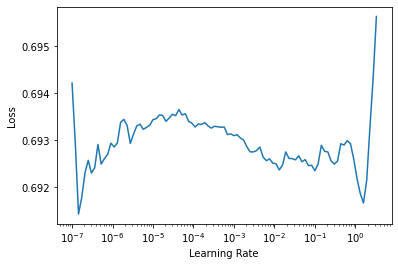

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.692660,0.693651,0.481651,0.483721,0.981132,01:40
1,0.692860,0.694809,0.481651,0.483568,0.971698,01:41
2,0.692816,0.695825,0.480122,0.482704,0.965409,01:40
3,0.693080,0.695538,0.478593,0.481890,0.962264,01:40


Better model found at epoch 0 with valid_loss value: 0.6936507225036621.


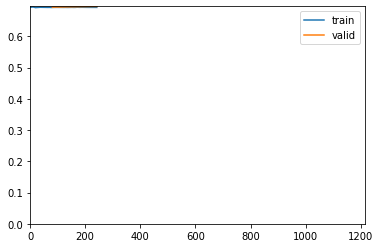

No improvement since epoch 0: early stopping


In [ ]:
learn.fit_flat_cos(15,lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5675340890884399.


(#4) [0.6907778978347778,0.5675340890884399,0.5674653215636822,0.9868421052631579]

## Ranger +Flat + Label + MixUp

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.693112,0.693091,0.484709,0.485179,0.977987,01:40
1,0.693124,0.693330,0.483180,0.484375,0.974843,01:41


Better model found at epoch 0 with valid_loss value: 0.6930910348892212.


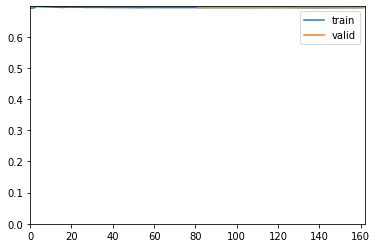

In [ ]:
learn.fit_flat_cos(2,lr=1e-3)

In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.693018,0.695289,0.477064,0.480952,0.952830,01:40
1,0.693098,0.693317,0.481651,0.483516,0.968553,01:40
2,0.692745,0.693239,0.481651,0.483516,0.968553,01:40
3,0.693123,0.692695,0.486239,0.485981,0.981132,01:41
4,0.693066,0.697161,0.472477,0.478537,0.946541,01:40
5,0.692751,0.696515,0.470948,0.477707,0.943396,01:41
6,0.692704,0.698485,0.472477,0.478537,0.946541,01:40


Better model found at epoch 0 with valid_loss value: 0.6952893137931824.


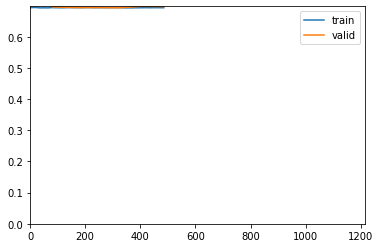

Better model found at epoch 1 with valid_loss value: 0.6933173537254333.
Better model found at epoch 2 with valid_loss value: 0.6932386159896851.
Better model found at epoch 3 with valid_loss value: 0.6926950216293335.
No improvement since epoch 3: early stopping


In [ ]:
learn.fit_flat_cos(15,lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

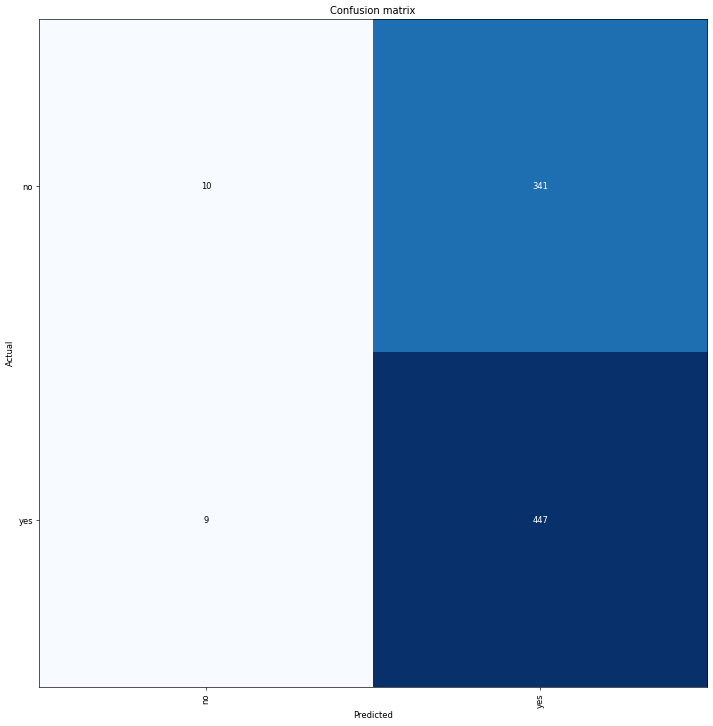

In [ ]:
learn.dls = dlsTest
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5662949085235596.


(#4) [0.690424382686615,0.5662949085235596,0.567258883248731,0.9802631578947368]

## Ranger + Flat + MixUp

In [ ]:
mixup=MixUp()
callbacks2 = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnest18'),
    mixup
]

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.693386,0.693945,0.483180,0.484326,0.971698,01:40
1,0.693390,0.693184,0.484709,0.485179,0.977987,01:40


Better model found at epoch 0 with valid_loss value: 0.6939454078674316.


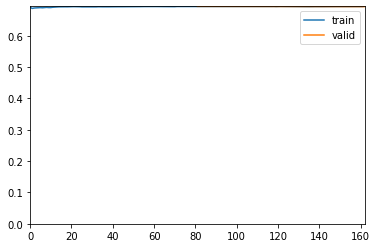

Better model found at epoch 1 with valid_loss value: 0.6931841969490051.


In [ ]:
learn.fit_flat_cos(2,lr=1e-3)

In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.692867,0.691882,0.484709,0.485271,0.984277,01:40
1,0.692827,0.691572,0.486239,0.486068,0.987421,01:41
2,0.693362,0.692563,0.484709,0.485226,0.981132,01:40
3,0.693578,0.693417,0.483180,0.484375,0.974843,01:40
4,0.692931,0.693554,0.480122,0.482704,0.965409,01:41


Better model found at epoch 0 with valid_loss value: 0.6918817162513733.


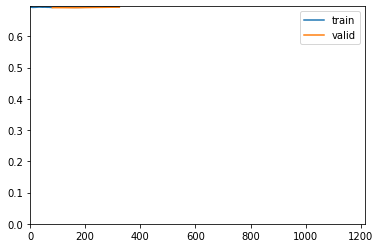

Better model found at epoch 1 with valid_loss value: 0.6915723085403442.
No improvement since epoch 1: early stopping


In [ ]:
learn.fit_flat_cos(15,lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.565055787563324.


(#4) [0.6913811564445496,0.565055787563324,0.5657071339173968,0.9912280701754386]

## Ranger + MixUp

In [ ]:
#opt_func = partial(ranger, beta=(0.9,0.99), eps=1e-6)

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.693234,0.692778,0.486239,0.485981,0.981132,01:41
1,0.692971,0.693002,0.486239,0.486025,0.984277,01:41


Better model found at epoch 0 with valid_loss value: 0.6927783489227295.


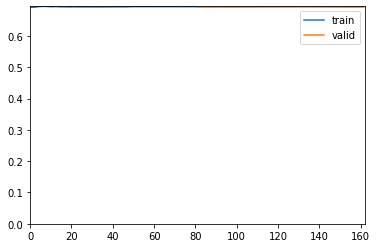

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.692913,0.693254,0.483180,0.484424,0.977987,01:41
1,0.693203,0.692637,0.486239,0.486025,0.984277,01:41
2,0.693015,0.692414,0.484709,0.485226,0.981132,01:41
3,0.692762,0.692798,0.486239,0.485938,0.977987,01:41
4,0.692924,0.692804,0.486239,0.485981,0.981132,01:41
5,0.693048,0.691745,0.486239,0.486025,0.984277,01:41
6,0.693069,0.692588,0.484709,0.485271,0.984277,01:41
7,0.692896,0.692590,0.484709,0.485271,0.984277,01:40
8,0.692818,0.693227,0.483180,0.484424,0.977987,01:40


Better model found at epoch 0 with valid_loss value: 0.6932543516159058.


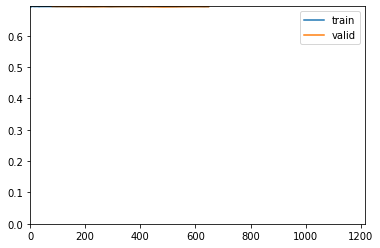

Better model found at epoch 1 with valid_loss value: 0.6926371455192566.
Better model found at epoch 2 with valid_loss value: 0.692413866519928.
Better model found at epoch 5 with valid_loss value: 0.691744863986969.
No improvement since epoch 5: early stopping


In [ ]:
learn.fine_tune(15,freeze_epochs=2,base_lr=lr)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.565055787563324.


(#4) [0.6912180185317993,0.565055787563324,0.5665399239543726,0.9802631578947368]

## Faltten + MixUp

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()])

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.693988,0.698092,0.493884,0.489633,0.965409,01:39
1,0.693985,0.702476,0.460245,0.468694,0.823899,01:39


Better model found at epoch 0 with valid_loss value: 0.6980919241905212.


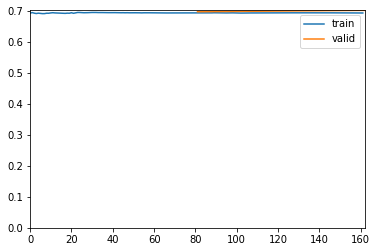

In [ ]:
learn.fit_flat_cos(2,lr=1e-3)

In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.702830,0.693222,0.486239,0.486239,1.000000,01:38
1,0.696233,0.693964,0.486239,0.486239,1.000000,01:38
2,0.694331,0.745002,0.489297,0.486301,0.893082,01:38
3,0.693144,0.967881,0.480122,0.479167,0.795597,01:38


Better model found at epoch 0 with valid_loss value: 0.6932220458984375.


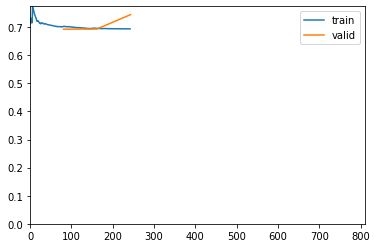

No improvement since epoch 0: early stopping


In [ ]:
learn.fit_flat_cos(10,lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.565055787563324.


(#4) [0.6928103566169739,0.565055787563324,0.5650557620817844,1.0]

## Ranger + Label

In [ ]:
#opt_func = partial(ranger, beta=(0.9,0.99), eps=1e-6)

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],opt_func=opt_func,loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.699177,0.724143,0.486239,0.486239,1.000000,01:41
1,0.698682,0.731704,0.486239,0.486239,1.000000,01:41


Better model found at epoch 0 with valid_loss value: 0.7241432070732117.


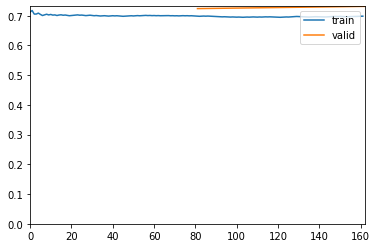

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.693801,0.742183,0.486239,0.486239,1.000000,01:39
1,0.695584,0.727303,0.486239,0.486239,1.000000,01:40
2,0.697183,0.732385,0.486239,0.486239,1.000000,01:40
3,0.695492,0.713871,0.486239,0.486239,1.000000,01:40
4,0.696050,0.730087,0.486239,0.486239,1.000000,01:41
5,0.696923,0.762012,0.486239,0.486239,1.000000,01:40
6,0.695812,0.719173,0.486239,0.486239,1.000000,01:40


Better model found at epoch 0 with valid_loss value: 0.7421825528144836.


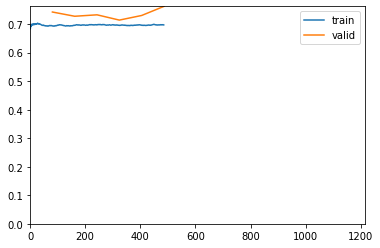

Better model found at epoch 1 with valid_loss value: 0.7273033261299133.
Better model found at epoch 3 with valid_loss value: 0.7138713598251343.
No improvement since epoch 3: early stopping


In [ ]:
learn.fine_tune(15,freeze_epochs=2,base_lr=lr)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.565055787563324.


(#4) [0.7198123931884766,0.565055787563324,0.5650557620817844,1.0]

## Faltten + Label

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.693719,0.711892,0.486239,0.486239,1.000000,01:38
1,0.693374,0.693244,0.486239,0.486239,1.000000,01:38


Better model found at epoch 0 with valid_loss value: 0.7118918299674988.


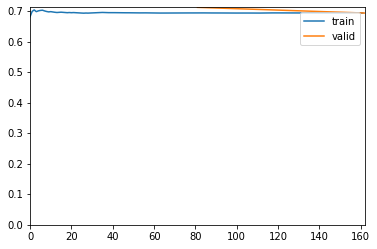

Better model found at epoch 1 with valid_loss value: 0.6932443976402283.


In [ ]:
learn.fit_flat_cos(2,lr=1e-3)

In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=0.003981071710586548, lr_steep=0.14454397559165955)

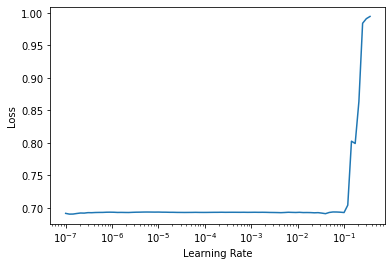

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.703384,73.283180,0.512232,0.498734,0.619497,01:38
1,0.695804,0.695898,0.513761,0.000000,0.000000,01:38
2,0.695101,0.693702,0.486239,0.486239,1.000000,01:39
3,0.697016,0.698366,0.483180,0.484663,0.993711,01:38
4,0.696343,0.762912,0.496942,0.491086,0.952830,01:38
5,0.694519,0.815190,0.504587,0.421053,0.050314,01:38


Better model found at epoch 0 with valid_loss value: 73.2831802368164.


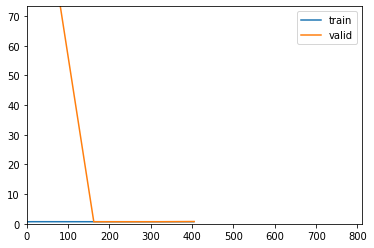

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Better model found at epoch 1 with valid_loss value: 0.69589763879776.
Better model found at epoch 2 with valid_loss value: 0.6937024593353271.
No improvement since epoch 2: early stopping


In [ ]:
learn.fit_flat_cos(10,lr=1e-4)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.565055787563324.


(#4) [0.69133061170578,0.565055787563324,0.5650557620817844,1.0]

## Label + MixUp

In [ ]:
learn = Learner(dls512, modelo,cbs = callbacks2,metrics=[accuracy,Precision(),Recall()],loss_func=LabelSmoothingCrossEntropy())

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.693679,0.715861,0.486239,0.486239,1.000000,01:38
1,0.692686,1.005939,0.486239,0.486239,1.000000,01:38


Better model found at epoch 0 with valid_loss value: 0.7158607244491577.


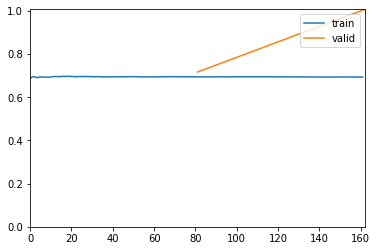

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.694031,0.702408,0.486239,0.486239,1.000000,01:38
1,0.692976,0.715723,0.486239,0.486239,1.000000,01:39
2,0.693392,0.693392,0.486239,0.486239,1.000000,01:38
3,0.693411,0.691653,0.493884,0.489533,0.955975,01:38
4,0.693105,0.692899,0.489297,0.487539,0.984277,01:38
5,0.693066,0.693589,0.486239,0.486239,1.000000,01:38
6,0.692966,0.692241,0.486239,0.486239,1.000000,01:39


Better model found at epoch 0 with valid_loss value: 0.7024081349372864.


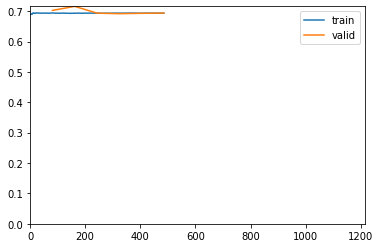

Better model found at epoch 2 with valid_loss value: 0.6933920383453369.
Better model found at epoch 3 with valid_loss value: 0.6916528344154358.
No improvement since epoch 3: early stopping


In [ ]:
learn.fine_tune(15,freeze_epochs=2,base_lr=lr)

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.548946738243103.


(#4) [0.6948069930076599,0.548946738243103,0.5606860158311345,0.9320175438596491]